# Лабораторная работа №2

**Цель работы:** практическое применение дискретного преобразования Фурье c
использованием библиотек Python для анализа речевых сигналов.

**Данные для работы:**
1. Средствами ОС Windows записать свой речевой сигнал.
2. Фраза — *Добрый день, я учусь в университете ЛЭТИ, на факультете компьютерных
технологий и информатики.*
3. *Формат записи* — моно-сигнал, 16000 гц или 22000 гц, без сжатия (wav-формат).

**Задачи лабораторной работы:**

1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса.
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на
записи своего голоса
3. Построить сонограмму по записи своего голоса.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import more_itertools as mi
from scipy.fftpack import fft, dct
from scipy.io.wavfile import read, write
from scipy import signal
from scipy import hamming

%matplotlib inline

In [2]:
rate, binary = read('voice.wav')
ipd.Audio('./voice.wav')

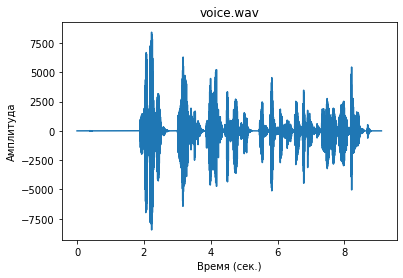

In [3]:
length = binary.shape[0] / rate
duration = np.linspace(0., length, binary.shape[0])

plt.plot(duration, binary)
plt.xlabel("Время (сек.)")
plt.ylabel("Амплитуда")
plt.title("voice.wav")
plt.show()

**1. Используя ДПФ построить траекторию основного тона (F0) на записи своего голоса:**

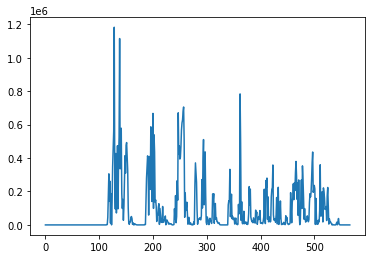

In [5]:
N = 1024
overlap = 0.25

windows = list(
    mi.windowed(binary, n=N, step=int(overlap * N))
)

sequences = windows

last_sequence = []
for index, element in enumerate(sequences[-1]):
    if element:
        last_sequence.append(element)
sequences[-1] = last_sequence

sequences = [i * np.hamming(len(i)) for i in sequences]

for index, element in enumerate(sequences):
    sequences[index] = fft(element)

spector = []
for element in sequences:
    spector.append(sum([k ** 2 for k in element[:int(len(element) / 2)]]) ** 0.5)

for index, element in enumerate(spector):
    spector[index] = element.real

spector = np.array(spector)

plt.plot(spector)
plt.show()

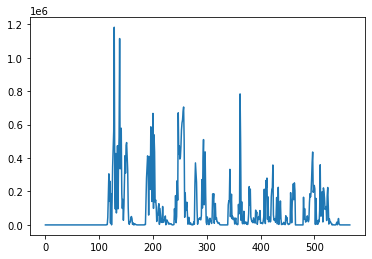

In [7]:
sr = int(rate / N)
limit_k = 2
F0 = []

trace = [spector[k:k + sr] for k in range(len(spector))[::sr]]

for element in trace:
    limit = element.mean() * limit_k
    if element.max() > limit:
        F0 += list(element)
    else:
        F0 += list(np.zeros(len(element)))

plt.plot(F0)
plt.show()

**2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса:**

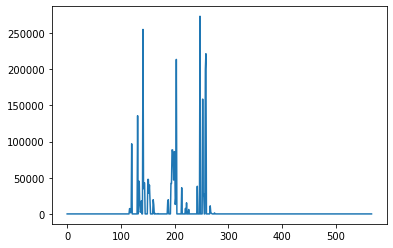

In [8]:
F1 = []

for index in range(len(F0)):
    if 2 * index + 1 >= len(F0) or 2 * index - 1 < 0:
        F1 += [0]
    else:
        limit = max(F0[2 * index - 1], F0[2 * index], F0[2 * index + 1])
        if F0[index] > limit_k * limit:
            F1 += [limit]
        else:
            F1 += [0]

plt.plot(F1)
plt.show()

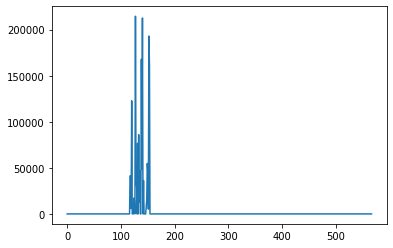

In [9]:
F2 = []

for index in range(len(F0)):
    if 3 * index - 1 < 0 or 3 * index + 1 >= len(F0):
        F2 += [0]
    else:
        limit = max(F0[3 * index - 1], F0[3 * index], F0[3 * index + 1])
        if F0[index] > limit_k * limit:
            F2 += [limit]
        else:
            F2 += [0]

plt.plot(F2)
plt.show()

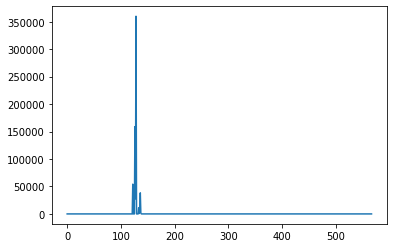

In [10]:
F3 = []

for index in range(len(F0)):
    if 4 * index - 1 < 0 or 4 * index + 1 >= len(F0):
        F3 += [0]
    else:
        limit = max(F0[4 * index - 1], F0[4 * index], F0[4 * index + 1])
        if F0[index] > limit_k * limit:
            F3 += [limit]
        else:
            F3 += [0]

plt.plot(F3)
plt.show()

**3. Построить сонограмму по записи своего голоса:**

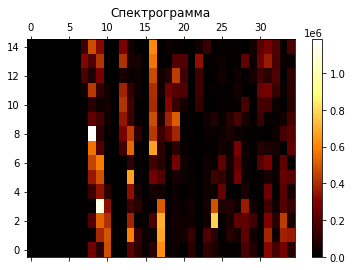

In [12]:
amp = []
trace = [spector[k:k + sr] for k in range(len(spector) - 56)[::sr]]
for element in trace:
    amp.append(element)

figure, ax = plt.subplots(nrows=1, ncols=1)
ax = ax.matshow(np.transpose(amp),interpolation="nearest",
                 aspect="auto",cmap=plt.cm.afmhot, origin="lower")
figure.colorbar(ax)
plt.title("Спектрограмма")
plt.show()

**Вывод:**

Выполнение данной лабораторной работы закрепило практические навыки работы с библиотеками языка программирования Python: matplotlib, scipy, numpy. С помощью них обрабатывались звуковые сигналы, выполнялось дискретное преобразование Фурье, чтобы анализировать речевые сигналы.
